In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

<h1 style="text-align:center; color:#6A5ACD; font-weight:bold; font-size:38px;">Brain Tumor Classification With Pytorch</h1>


<center> <img src="https://my.clevelandclinic.org/-/scassets/images/org/health/articles/6149-brain-tumor" alt ="Brain Tumor" style='width:50%;'> </center>

# 🧠 Brain Tumor MRI Dataset

### 📖 Overview
This dataset contains MRI scans categorized into four classes: **Glioma**, **Meningioma**, **Pituitary Tumor**, and **No Tumor**. It is designed for researchers and data scientists working on brain tumor classification, medical image analysis, and machine learning model development. The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset) and provides a comprehensive collection of brain MRI images to facilitate the study of brain tumors.

### 📂 Dataset Description
- **Total Images**: Approximately 7,000 MRI scans
- **Classes**: 
  - Glioma
  - Meningioma
  - Pituitary Tumor
  - No Tumor
- **Format**: Images are in `.jpg` format
- **Structure**: The dataset is split into **Training** and **Testing** folders, each containing subfolders for the four classes.
- **Image Size**: Varies, typically 512x512 pixels

### 🧬 About Brain Tumors
Brain tumors are abnormal growths of cells within the brain or its surrounding tissues. They can be benign (non-cancerous) or malignant (cancerous) and are classified based on their origin and behavior. Common types include:

- **Glioma**: Arises from glial cells. It is one of the most common and aggressive types of brain tumors. Gliomas often require rapid intervention due to their infiltrative nature.
- **Meningioma**: Develops from the meninges, the protective layers around the brain and spinal cord. While often benign, they can still cause serious complications depending on their size and location.
- **Pituitary Tumor**: Affects the pituitary gland at the brain's base, influencing hormonal balance and body functions. These are generally benign but can lead to endocrine disorders.
- **No Tumor**: MRI scans showing healthy brains, used as a baseline/control group for classification tasks.

Early detection through imaging techniques like MRI is critical for diagnosis and treatment planning. This dataset aims to support the development of automated classification models to assist radiologists in identifying tumor types accurately.

### 🚀 Potential Applications

- **Brain Tumor Classification**: Developing convolutional neural networks (CNNs) or other deep learning models to classify MRI scans into tumor types or normal cases.
- **Medical Image Segmentation**: Identifying and segmenting tumor regions in MRI scans for precise diagnosis.
- **Transfer Learning**: Utilizing pre-trained models (e.g., ResNet, VGG) for feature extraction and fine-tuning on this dataset.
- **Research and Education**: Supporting academic research and teaching in medical imaging and machine learning.


### 💡 Example Use Case

Train a deep learning model to classify MRI scans into one of the four categories (**Glioma**, **Meningioma**, **Pituitary Tumor**, **No Tumor**). Use image preprocessing techniques such as resizing, normalization, and augmentation (rotation, flipping, zooming) to improve model robustness and performance.

### 🎯 Conclusion

This dataset is a valuable resource for advancing automated brain tumor diagnosis, improving early detection, and fostering innovation in medical imaging technologies. By enabling AI-assisted diagnostics, we can move closer to faster, more accurate, and more accessible healthcare solutions for patients worldwide.



<h1 style="text-align:left; color:#6A5ACD; font-weight:bold; font-size:28px; font-family:Arial, sans-serif;">Import Libraries</h1>

In [2]:
# utils
import os 
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# torch
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models, datasets

#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6A5ACD; overflow:hidden"><b>Reading The Data</b></div>

In [3]:
base_directory = '/kaggle/input/brain-tumor-mri-dataset'
train, test = 'Training', 'Testing'
target_size = (224, 224)
random_state = 42
batch_size = 32
num_classes = 4
device = "cuda" if torch.cuda.is_available() else "cpu"
label_map = {
    'notumor': 0,        
    'glioma': 1,         
    'meningioma': 2,     
    'pituitary': 3       
}

In [4]:
categories = os.listdir(base_directory+'/'+train)
print(categories)

['pituitary', 'notumor', 'meningioma', 'glioma']


In [122]:
def display_images(dataset_type, num_images=4, image_size=(224, 224)):
    
    dataset_path = os.path.join(base_directory, dataset_type)

    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))

    for row, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        image_filenames = random.sample(os.listdir(category_path), num_images)  # Select random images
        
        for col, image_filename in enumerate(image_filenames):
            while image_filename == '.DS_Store':
                image_filename = random.sample(os.listdir(category_path), 1)[0]
            image_path = os.path.join(category_path, image_filename)
            image = Image.open(image_path).resize(image_size)
            axes[row, col].imshow(image, cmap='gray')
            axes[row, col].axis('off')
            axes[row, col].set_title(f"{category}")

    plt.tight_layout()
    plt.show()

## Exploring the Data

In [6]:
def plot_class_distribution(dataset_type):
    path = os.path.join(base_directory, dataset_type)
    counts = [len(os.listdir(os.path.join(path, cat))) for cat in categories]

    plt.bar(categories, counts, color = ['navy', 'teal', 'darkorange', 'crimson'])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_type.capitalize()} Set Distribution")
    plt.show()

### Train set

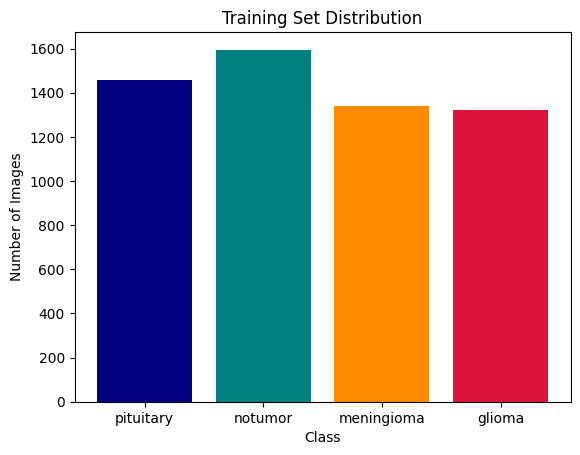

In [7]:
plot_class_distribution(train)

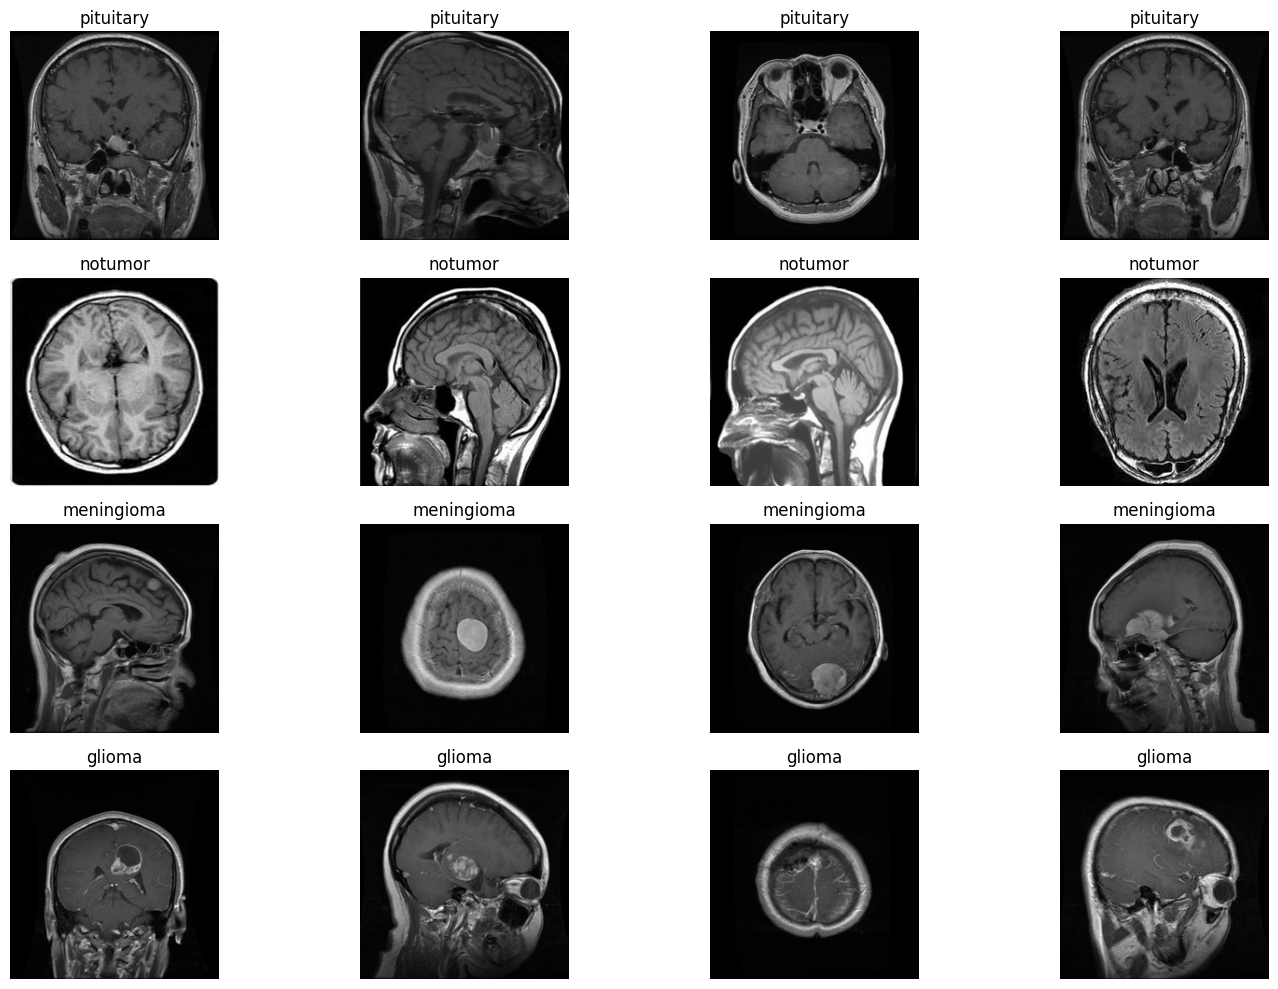

In [123]:
display_images(train)

### Test Set

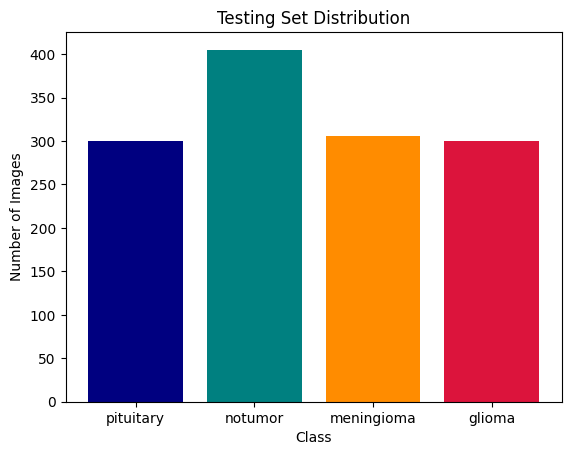

In [9]:
plot_class_distribution(test)

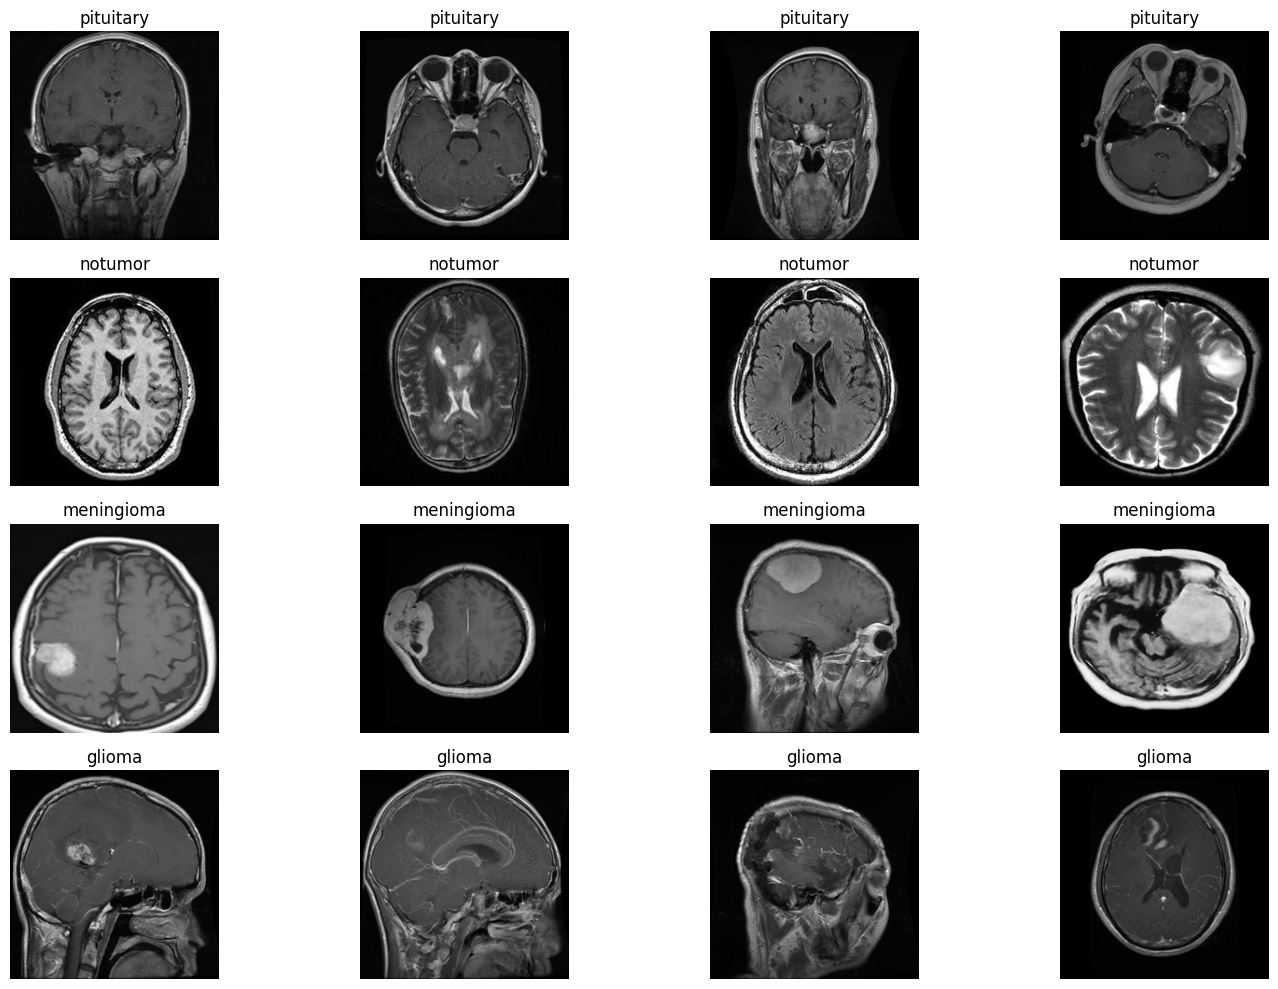

In [124]:
display_images(test)

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6A5ACD; overflow:hidden"><b>Preparing the Data</b></div>

In [11]:
def create_dataset(path):
    my_list = []
    for category in categories:
        category_path = os.path.join(path, category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            # Ensure we're only adding image files
            if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                my_list.append([file_path, category])
    return pd.DataFrame(my_list, columns=['file_path', 'label'])

In [12]:
train_df = create_dataset(base_directory+'/'+train)
test_df = create_dataset(base_directory+'/'+test)

In [13]:
train_df['label'] = train_df['label'].map(label_map)
test_df['label'] = test_df['label'].map(label_map)

## Create Class ImageDataset

In [14]:
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]
        img = Image.open(img_path).convert('RGB')  

        if self.transform:
            img = self.transform(img)
            
        return img, label

## Data Augmentation

In [15]:
train_transform = transforms.Compose([

   transforms.Resize(target_size),
   transforms.RandomHorizontalFlip(),
   transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
   transforms.ColorJitter(brightness=(0.8, 1.2)),
   transforms.RandomRotation(10),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



In [16]:
test_df_split, val_df_split = train_test_split(test_df, test_size=0.5, random_state=random_state)
# Reset indices for consistency
test_df_split = test_df_split.reset_index(drop=True)
val_df_split = val_df_split.reset_index(drop=True)

In [17]:
train_dataset = ImageDataset(train_df, transform=train_transform)
val_dataset = ImageDataset(val_df_split, transform=test_transform)
test_dataset = ImageDataset(test_df_split, transform=test_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6A5ACD; overflow:hidden"><b>Model 1 (Custom CNN)</b></div>

## 🧠 Convolutional Neural Network (CNN) Architecture

The following diagram represents the architecture of our Convolutional Neural Network (CNN) used for **brain tumor classification**.

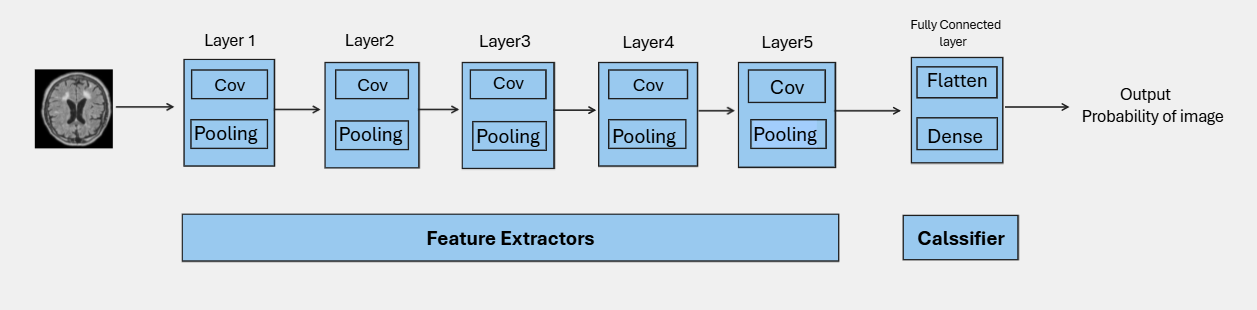


---

### Architecture Breakdown

#### 📥 Input Layer

The input is a brain MRI image (e.g., a scan showing the presence or absence of a tumor) that enters the network.

---

#### 🔍 Feature Extractors

The CNN consists of multiple convolutional layers followed by pooling layers:

- **Layer 1:** Convolution (Conv) + Pooling  
- **Layer 2:** Convolution (Conv) + Pooling  
- **Layer 3:** Convolution (Conv) + Pooling  
- **Layer 4:** Convolution (Conv) + Pooling  
- **Layer 5:** Convolution (Conv) + Pooling  

These layers extract meaningful spatial and texture features from the input image that are important for identifying tumor types.

---

#### 🧠 Classifier

The extracted features are passed through a fully connected (dense) layer:

- **Flatten:** Converts the final feature maps into a 1D array.  
- **Dense:** A fully connected layer to learn high-level representations.  
- **Dropout:** Applied for regularization and to reduce overfitting during training.

---

#### 🎯 Output Layer

A final dense layer provides the probability of the MRI image belonging to one of the predefined tumor classes (e.g., glioma, meningioma, pituitary tumor, or no tumor).

---

This CNN is designed to **efficiently classify brain tumors** by learning deep hierarchical features from MRI scans and making accurate predictions. 🧬📊🧠


In [60]:
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

        # Conv Block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (B, 32, 224, 224)

        # Conv Block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # (B, 64, 112, 112)

        # Conv Block 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # (B, 128, 56, 56)

        # Conv Block 4
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # (B, 256, 28, 28)

        # Conv Block 5
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1) # (B, 256, 14, 14)

        # Final shape after pool: (B, 256, 7, 7)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # (B, 32, 112, 112)
        x = self.pool(self.relu(self.conv2(x)))  # (B, 64, 56, 56)
        x = self.pool(self.relu(self.conv3(x)))  # (B, 128, 28, 28)
        x = self.pool(self.relu(self.conv4(x)))  # (B, 256, 14, 14)
        x = self.pool(self.relu(self.conv5(x)))  # (B, 256, 7, 7)

        x = self.flatten(x)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

In [19]:
model = BrainTumorCNN(num_classes=4).to(device) 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)  

In [20]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, name='model', patience=7):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    best_val_loss = float("inf")
    tolerance = 0  # Counter for early stopping
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")
        print("#" * 80)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), f'best_brain_tumor_{name}.pth')
            tolerance = 0  
        else:
            tolerance += 1
            if tolerance >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs.")
                break

    return history


In [21]:
def test_model(model, test_loader, num_images_to_show=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    correct = 0
    total = 0
    
    all_preds = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Collect for later analysis
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_images.extend(images.cpu())  # Store images for visualization

    test_acc = 100 * correct / total

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Test Accuracy: {test_acc:.2f}%\n")
    
    # Print classification report
    print("Classification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=categories))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=categories, yticklabels=categories)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [22]:
print("Starting training...")
history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=60)

Starting training...
Epoch [1/60]
Train Loss: 1.0012, Train Accuracy: 56.23%
Val Loss: 0.7859, Val Accuracy: 71.65%
################################################################################
Epoch [2/60]
Train Loss: 0.6410, Train Accuracy: 74.02%
Val Loss: 0.5350, Val Accuracy: 80.03%
################################################################################
Epoch [3/60]
Train Loss: 0.5371, Train Accuracy: 79.27%
Val Loss: 0.5327, Val Accuracy: 78.96%
################################################################################
Epoch [4/60]
Train Loss: 0.4356, Train Accuracy: 83.44%
Val Loss: 0.6230, Val Accuracy: 75.00%
################################################################################
Epoch [5/60]
Train Loss: 0.3515, Train Accuracy: 87.11%
Val Loss: 0.2787, Val Accuracy: 88.87%
################################################################################
Epoch [6/60]
Train Loss: 0.2876, Train Accuracy: 89.39%
Val Loss: 0.3471, Val Accuracy: 86.43%
####

In [23]:
def plot_training_history(history, model_name="model"):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

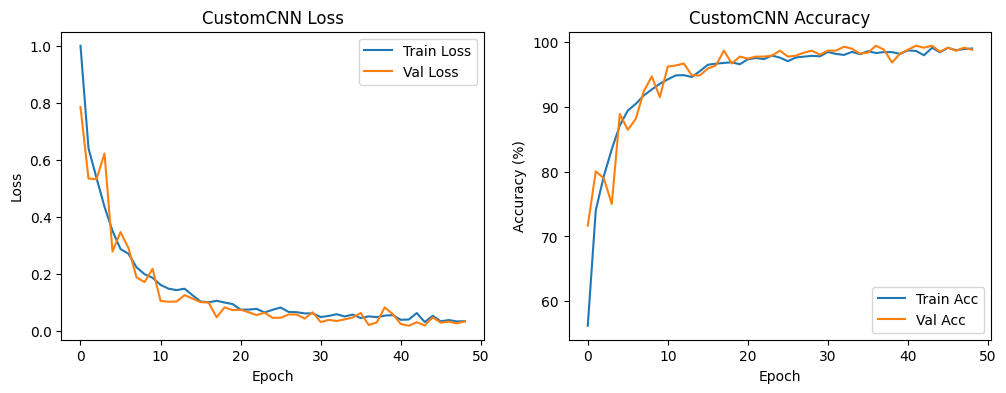

In [24]:
plot_training_history(history, model_name="CustomCNN")

## Evaluation 


Loading best model for testing...
Test Accuracy: 99.54%

Classification Report:

              precision    recall  f1-score   support

   pituitary       1.00      1.00      1.00       197
     notumor       1.00      0.99      0.99       151
  meningioma       0.99      1.00      0.99       158
      glioma       0.99      0.99      0.99       149

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655



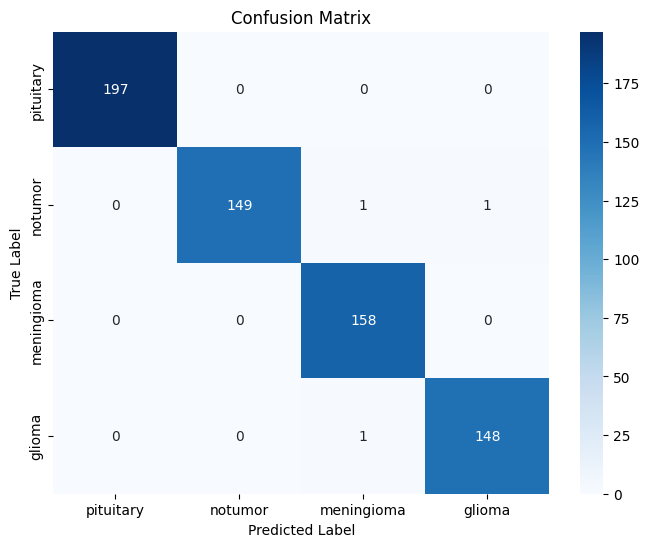

In [25]:
print("\nLoading best model for testing...")
model.load_state_dict(torch.load('best_brain_tumor_model.pth'))
test_model(model, test_loader)

In [131]:
def visualize_predictions(model, test_loader, num_images=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    correct_images, incorrect_images = [], []
    correct_labels, incorrect_labels = [], []
    correct_preds, incorrect_preds = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Separate correct and incorrect predictions
            for i in range(len(predicted)):
                if predicted[i] == labels[i]:
                    correct_images.append(images[i])
                    correct_labels.append(labels[i].cpu().item())
                    correct_preds.append(predicted[i].cpu().item())
                else:
                    incorrect_images.append(images[i])
                    incorrect_labels.append(labels[i].cpu().item())
                    incorrect_preds.append(predicted[i].cpu().item())

    # Visualization
    # Unnormalize using your mean and std
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(device)

    num_cols = num_images // 2
    plt.figure(figsize=(15, 7))

    # Display correct predictions
    for i, img_tensor in enumerate(correct_images[:num_images // 2]):
        img_tensor = img_tensor * std + mean  # reverse normalization
        img = np.clip(img_tensor.permute(1, 2, 0).cpu().numpy(), 0, 1)
        plt.subplot(2, num_cols, i + 1)
        plt.imshow(img)
        plt.title(f"True: {categories[correct_labels[i]]}\nPred: {categories[correct_preds[i]]}", color='green', fontsize=15)
        plt.axis('off')

    # Display incorrect predictions
    for i, img_tensor in enumerate(incorrect_images[:num_images // 2]):
        if i >= len(incorrect_images):
            plt.axis('off')
            continue
        img_tensor = img_tensor * std + mean  # reverse normalization
        img = np.clip(img_tensor.permute(1, 2, 0).cpu().numpy(), 0, 1)
        plt.subplot(2, num_cols, num_cols + i + 1)
        plt.imshow(img)
        plt.title(f"True: {categories[incorrect_labels[i]]}\nPred: {categories[incorrect_preds[i]]}", color='red', fontsize=15)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


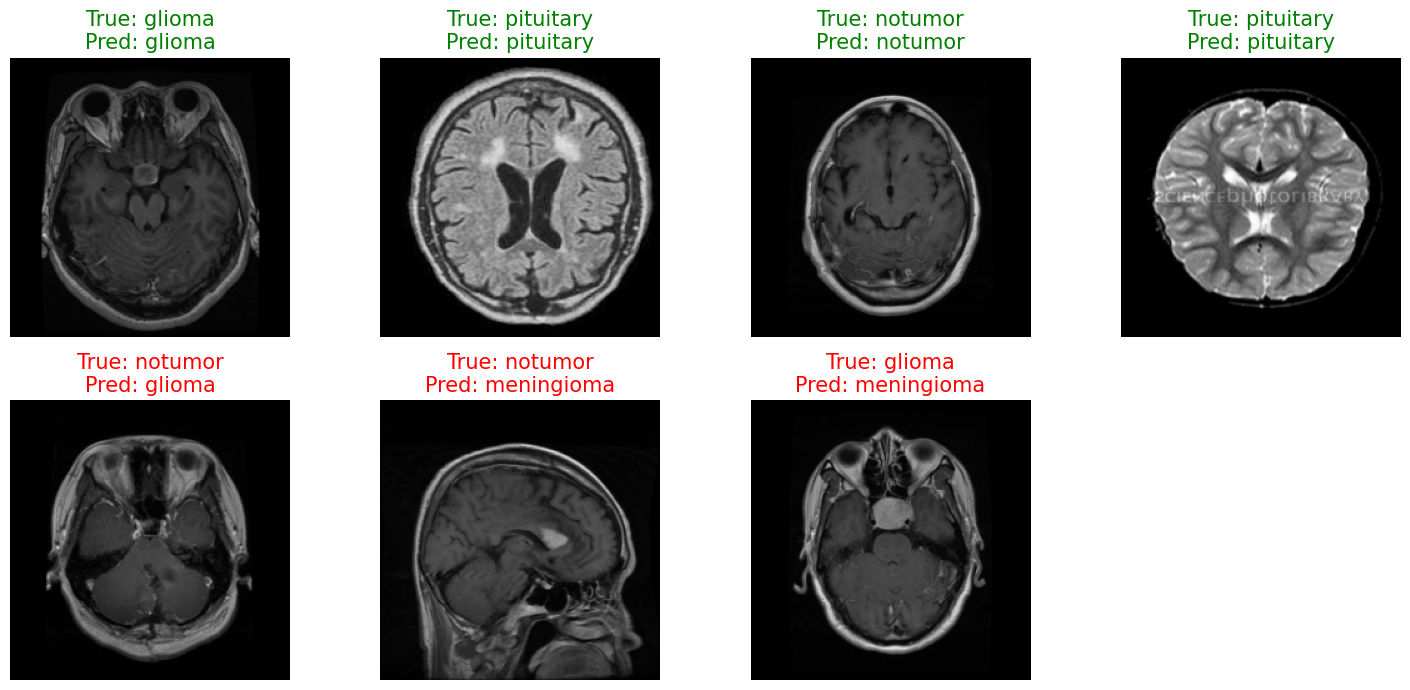

In [132]:
visualize_predictions(model, test_loader, 8)

## Model Performance and Future Work

The **Custom CNN** model achieved a **satisfactory accuracy of 99.54%**, which is a strong result and indicates good performance on the classification task. However, to further explore the potential for improvement and leverage transfer learning, I would like to experiment with a **pretrained model in PyTorch**.


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6A5ACD; overflow:hidden"><b>Model 2 (ResNet18)</b></div>

<div style="text-align:center;">
  <img src="https://d2l.ai/_images/residual-block.svg" width="500px">
</div>

## 🧠 ResNet: Residual Networks

**ResNet**, short for **Residual Networks**, is a classic deep learning architecture widely used as a backbone for many computer vision tasks. It was the **winner of the ImageNet challenge in 2015**, marking a major milestone in the development of deep neural networks.

The fundamental breakthrough of ResNet is that it **enabled the successful training of extremely deep neural networks**—with **over 150 layers**—something that was previously very difficult to achieve.

### 🚧 The Challenge: Vanishing Gradients

Before ResNet, simply stacking more layers in a neural network didn’t guarantee better performance. In fact, **training very deep networks was hindered by the vanishing gradient problem**. As gradients are back-propagated through many layers, they can become extremely small due to repeated multiplication. This leads to earlier layers learning very slowly, or not at all.

As a result, increasing the depth of a network often caused **performance to saturate or even degrade**.

### ✅ The Solution: Residual Learning

ResNet addresses this problem by introducing **residual connections** (also known as *skip connections*), which allow gradients to flow more easily through the network. These connections help preserve the signal during backpropagation, making it possible to train much deeper networks effectively.


In [69]:
# Load pretrained ResNet-18 model
model2 = models.resnet18(pretrained=True)

In [70]:
# Freeze all layers except the final fully connected layer
for param in model2.parameters():
    param.requires_grad = False

In [71]:
num_ftrs = model2.fc.in_features
model2.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),  
    nn.ReLU(),                
    nn.Dropout(0.5),           
    nn.Linear(512, 4)          
)

In [72]:
# Move model to device
model2 = model2.to(device)

In [73]:
optimizer = optim.Adam(model2.fc.parameters(), lr=0.001)

In [74]:
print("Starting training...")
history = train_model(model2, train_loader, val_loader, criterion, optimizer, num_epochs=60, name='resnet18')

Starting training...
Epoch [1/60]
Train Loss: 0.6400, Train Accuracy: 74.11%
Val Loss: 0.5267, Val Accuracy: 78.35%
################################################################################
Epoch [2/60]
Train Loss: 0.4575, Train Accuracy: 82.32%
Val Loss: 0.4183, Val Accuracy: 82.77%
################################################################################
Epoch [3/60]
Train Loss: 0.4252, Train Accuracy: 83.65%
Val Loss: 0.4349, Val Accuracy: 82.47%
################################################################################
Epoch [4/60]
Train Loss: 0.4052, Train Accuracy: 84.72%
Val Loss: 0.3837, Val Accuracy: 85.06%
################################################################################
Epoch [5/60]
Train Loss: 0.3919, Train Accuracy: 84.68%
Val Loss: 0.4210, Val Accuracy: 83.54%
################################################################################
Epoch [6/60]
Train Loss: 0.3722, Train Accuracy: 85.82%
Val Loss: 0.3860, Val Accuracy: 83.99%
####

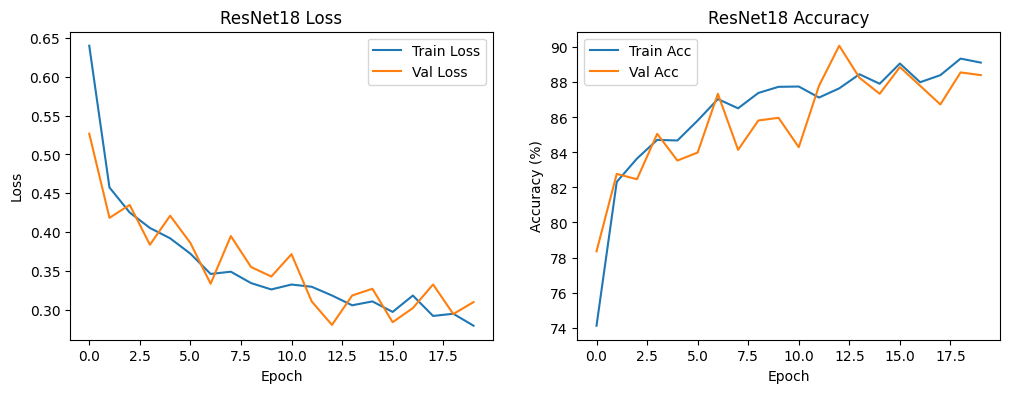

In [75]:
plot_training_history(history, model_name="ResNet18")


Loading best model for testing...
Test Accuracy: 89.16%

Classification Report:

              precision    recall  f1-score   support

   pituitary       0.93      0.95      0.94       197
     notumor       0.90      0.85      0.87       151
  meningioma       0.79      0.78      0.79       158
      glioma       0.94      0.97      0.95       149

    accuracy                           0.89       655
   macro avg       0.89      0.89      0.89       655
weighted avg       0.89      0.89      0.89       655



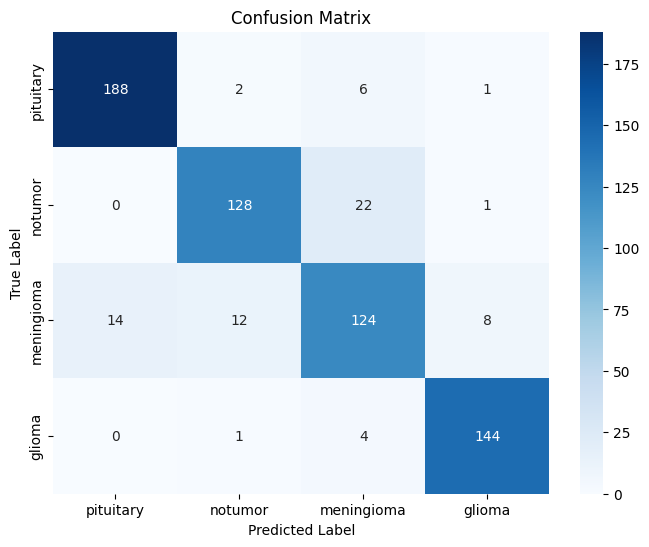

In [76]:
print("\nLoading best model for testing...")
model2.load_state_dict(torch.load('best_brain_tumor_resnet18.pth'))
test_model(model2, test_loader)

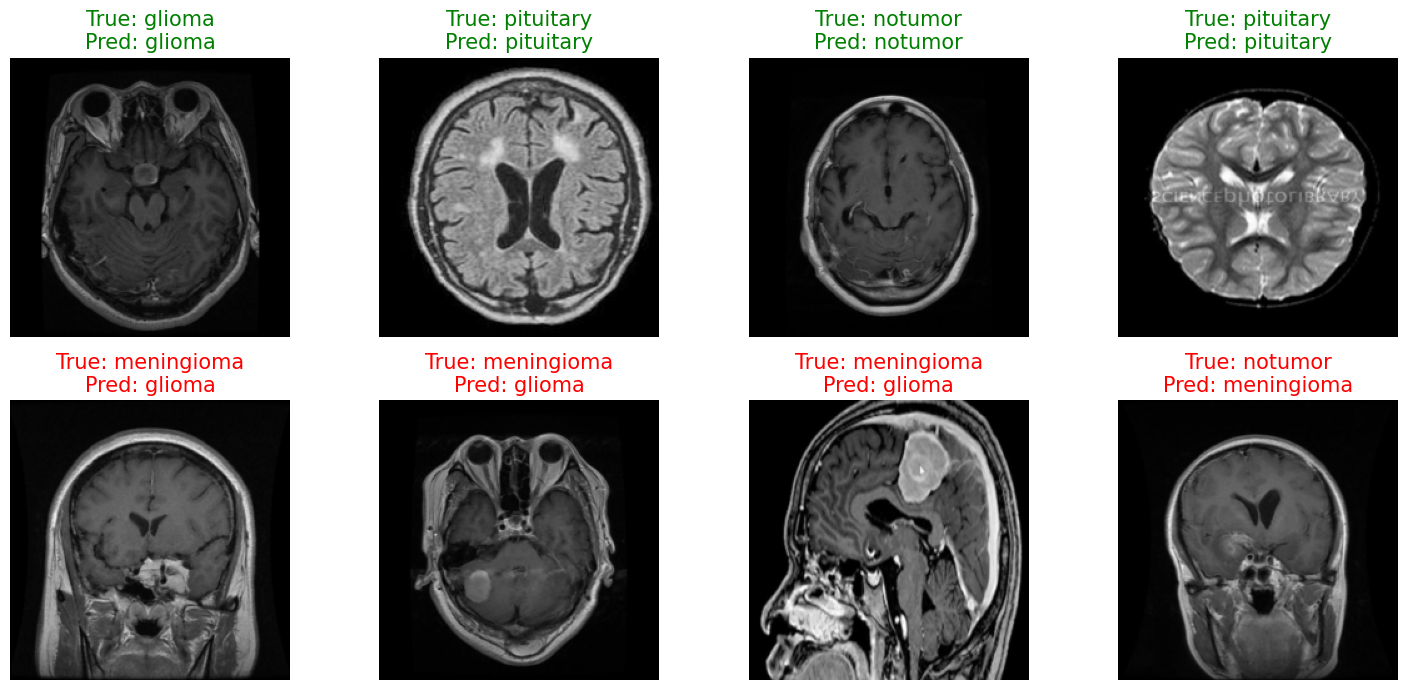

In [136]:
visualize_predictions(model2, test_loader, 8)

## FineTuning

In [78]:
# Unfreeze layer4 and fc
for name, param in model2.named_parameters():
    if 'layer4' in name or 'layer3' in name or 'fc' in name:
        param.requires_grad = True

In [79]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=1e-4)

In [80]:
print("Starting training...")
history = train_model(model2, train_loader, val_loader, criterion, optimizer, num_epochs=30, name='resnet18_finetuned')

Starting training...
Epoch [1/30]
Train Loss: 0.2434, Train Accuracy: 90.65%
Val Loss: 0.1652, Val Accuracy: 94.21%
################################################################################
Epoch [2/30]
Train Loss: 0.1298, Train Accuracy: 95.15%
Val Loss: 0.1590, Val Accuracy: 93.90%
################################################################################
Epoch [3/30]
Train Loss: 0.1024, Train Accuracy: 96.55%
Val Loss: 0.1003, Val Accuracy: 95.88%
################################################################################
Epoch [4/30]
Train Loss: 0.0776, Train Accuracy: 97.48%
Val Loss: 0.0362, Val Accuracy: 98.48%
################################################################################
Epoch [5/30]
Train Loss: 0.0708, Train Accuracy: 97.76%
Val Loss: 0.1519, Val Accuracy: 95.73%
################################################################################
Epoch [6/30]
Train Loss: 0.0610, Train Accuracy: 98.07%
Val Loss: 0.0980, Val Accuracy: 96.19%
####

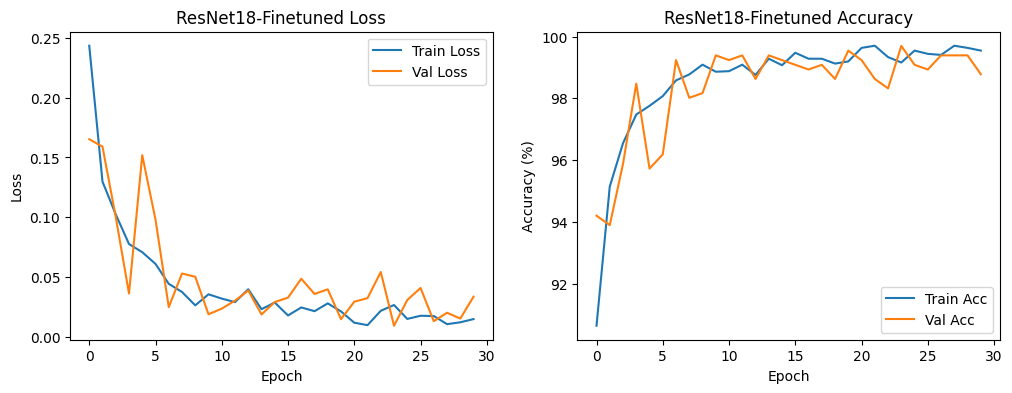

In [81]:
plot_training_history(history, model_name="ResNet18-Finetuned")


Loading best model for testing...
Test Accuracy: 99.69%

Classification Report:

              precision    recall  f1-score   support

   pituitary       1.00      0.99      1.00       197
     notumor       0.99      1.00      1.00       151
  meningioma       0.99      0.99      0.99       158
      glioma       1.00      1.00      1.00       149

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655



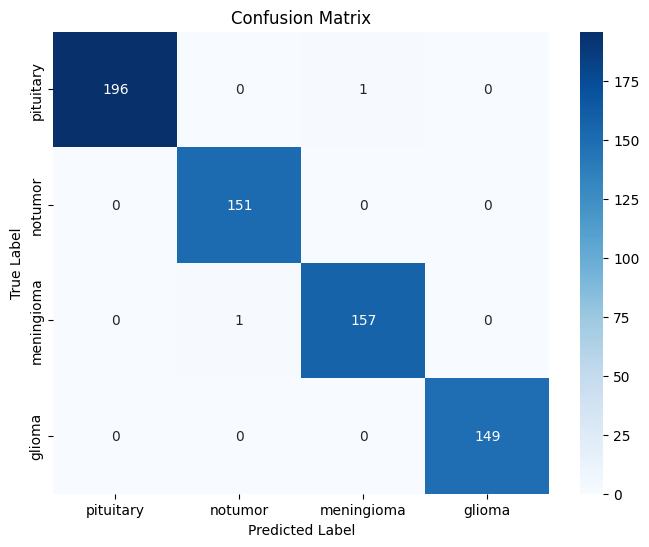

In [82]:
print("\nLoading best model for testing...")
model2.load_state_dict(torch.load('best_brain_tumor_resnet18_finetuned.pth'))
test_model(model2, test_loader)

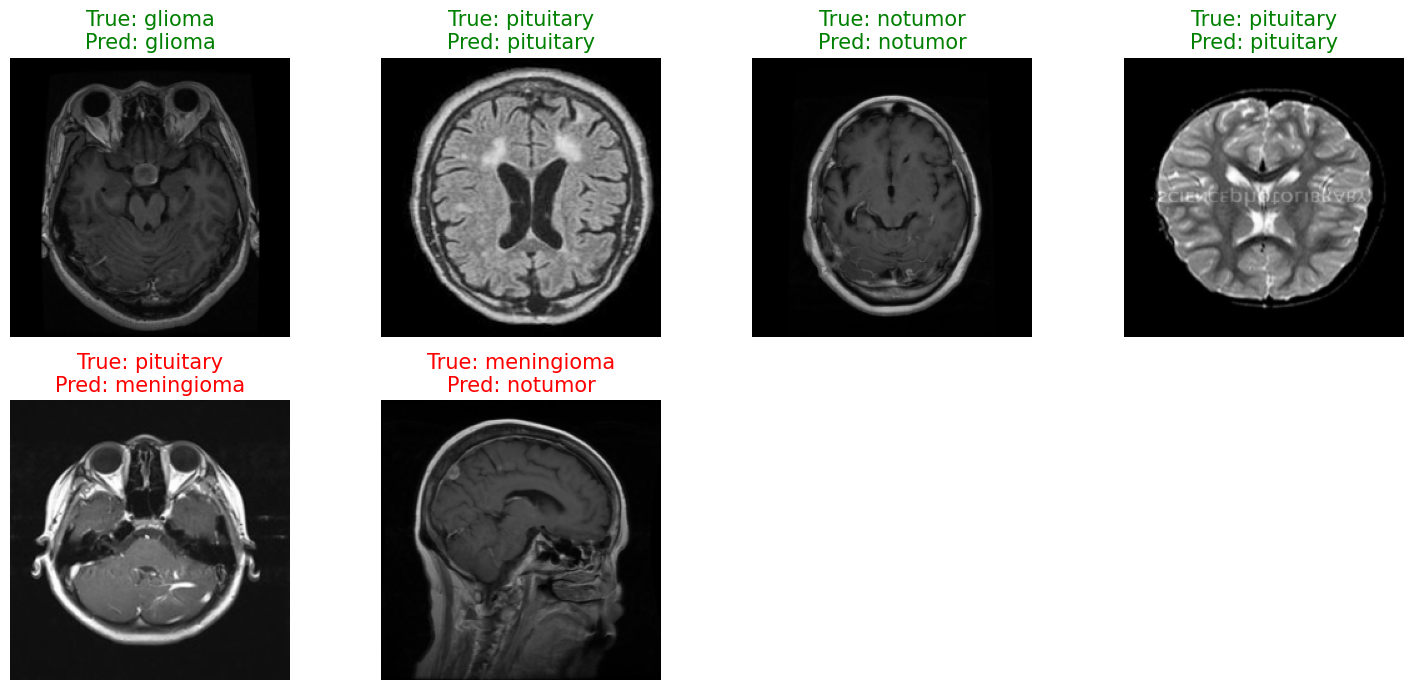

In [134]:
visualize_predictions(model2, test_loader, 8)

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6A5ACD; overflow:hidden"><b>Conclusion</b></div>

## 📌 Conclusion

In this notebook, we tackled the problem of **brain tumor classification** using deep learning with PyTorch. Our pipeline included:

- **Data Loading and Preprocessing**: Applied transformations and normalization to prepare MRI images.
- **Model Architecture**: Implemented both a **custom CNN** and a **transfer learning** model to compare their performance.
- **Training and Evaluation**: Both models were trained over several epochs, and their performance was tracked using accuracy and loss metrics.

### 🎯 Model Performance

- The **Custom CNN** achieved an impressive **test accuracy of 99.54%**, demonstrating its ability to effectively learn from scratch and generalize to unseen data.
- The **Transfer Learning model**, using a pre-trained architecture, outperformed the custom model and reached an outstanding **test accuracy of 99.7%**. This result highlights the power of leveraging learned features from large datasets like ImageNet to improve performance in specialized domains such as medical imaging.

These results show that both approaches are valid, but transfer learning offers a performance edge—especially when training data is limited.

### 🔬 Key Takeaways

- Deep learning shows strong potential in automating medical imaging tasks.
- With the right data and architecture, CNNs can achieve high accuracy in complex classification problems.
- There’s room for further enhancement through techniques like transfer learning, ensemble methods, or real-world deployment.

---

🙌 **Thank You for Checking Out This Notebook!**  
If you found it helpful, please leave feedback or an upvote! 🚀
